# Task3 特征工程
对于特征进行进一步分析，并对于数据进行处理

完成对于特征工程的分析，并对于数据进行一些图表或者文字总结并打卡。

## 3.1特征工程目标


将数据转换为能更好地表示潜在问题的特征，从而增强数据的表达,提高机器学习的性能。

## 3.2特征工程内容

常见特征工程

*1.异常处理

- 通过箱线图或3-Sigma分析删除异常值
- BOX-COX转换（处理有偏分布）
-  广义幂变换，让数据满足线性模型的基本假定，即线性、正态性及方差齐性。
- 长尾截断

*2.特征归一化/标准化

- 标准化（转换为标准正态分布）
- 归一化（转换到[0,1]区间）
- 针对幂律分布，可以采用公式

*3.数据分桶（类似分类/分组，将连续变量离散化，将多状态的离散变量合并成少状态。）

- 等频分桶
- 等距分桶
-   Best-KS分桶（类似利用基尼系数进行二分类） 

- 卡方分桶（依赖于卡方检验，具有最小卡方值的相邻区间合并在一起）

*4.缺失值处理

- 不处理（针对类似XGBoost等树模型）
- 删除（缺失数据太多）
-   差值补全，均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等
- 分箱（缺失值一个箱）

*5.特征构造

- 构造统计量特征，包括计数、求和、比例、标准差等
-   时间特征，包括相对时间和绝对时间，节假日，双休日
-   地理信息，包括分箱、分布编码等方法
-   非线性变换，包括log、平方、根号
-  特征组合，特征交叉
-  仁者见仁智者见智

*6.特征筛选

- 过滤式（filter）：现对数据进行特征选择，然后再训练学习器，常见的方法有Relief/方差选择法/相关系数法/卡方检验法/互信息法
-   包裹式（wrapper）：直接把最终要使用的学习器的性能作为特征子集的评价准则，常见方法有LVM（Las Vegas Wrapper)
- 嵌入式（embedding):结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有lasso

*7.降维

- PCA/LDA/ICA
-  特征选择也是一种降维




## 3.3代码部分

### 3.3.1导入库和数据

In [1]:
## 基础工具
# 用于数据操作的pandas和numpy
import numpy as np
import pandas as pd
#统计包
import scipy.stats as st
from scipy.special import jn

import warnings
warnings.filterwarnings('ignore')
# 可视化工具包
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
pd.set_option('display.max_columns',50) #设置最大显示的列数


In [2]:
import os
os.chdir(r"C:\Users\Thinkpad\Desktop\datamining")
## 1) 载入训练集和测试集；
Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
TestA_data = pd.read_csv('used_car_testA_20200313.csv', sep=' ')

In [3]:
print('Train data shape:',Train_data.shape)
Train_data.head().append(Train_data.tail())

Train data shape: (150000, 31)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
print('TestA_data shape:',TestA_data.shape)
TestA_data.head().append(TestA_data.tail())

TestA_data shape: (50000, 30)


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,0.0,3219,0,0,20160320,45.621391,5.958453,-0.918571,0.774826,-2.021739,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,0.0,1857,0,0,20160329,43.935162,4.476841,-0.841710,1.328253,-1.292675,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,0.0,3452,0,0,20160305,46.537137,4.170806,0.388595,-0.704689,-1.480710,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,0.0,1998,0,0,20160404,46.771359,-3.296814,0.243566,-1.277411,-0.404881,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,0.0,3276,0,0,20160322,43.731010,-3.121867,0.027348,-0.808914,2.116551,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


### 3.3.2 异常值处理

根据EDA发现 'seller','offerType'基本没有提供信息故可以直接剔除，'notRepairedDamage'中含有'-'需要用nan替换转换为数值型

In [5]:

Train_data.drop(['seller','offerType'],axis=1,inplace=True)
TestA_data.drop(['seller','offerType'],axis=1,inplace=True)
Train_data['notRepairedDamage'] = Train_data['notRepairedDamage'].apply(lambda x : float(x) if x!='-' else np.nan)
TestA_data['notRepairedDamage'] = TestA_data['notRepairedDamage'].apply(lambda x : float(x) if x!='-' else np.nan)

#### 缺失值处理
>**思路**

若缺失数据量极少，则直接剔除缺失数据。

若缺失数据量过多（占大多数），则直接剔除此变量。

若缺失数据不占多数（仍能提供有效信息），则做补全。


>需注意有时候不需要处理：

1.使用XGBoost等决策树模型

2.缺失状况传达某种信息（例如：卖家填写车辆信息时，负面车况相关的选项若非必填，则卖家有诱因不填写），故此缺失可视为一种类别

In [6]:
#训练集中'model'就缺失一个所以可以剔除 但不可以剔除测试集中的数据
train_m = Train_data.dropna(subset=['model'])
train_m.shape

(149999, 29)

 'bodyType', 'fuelType', 'gearbox'按补全处理

In [7]:
train_b = train_m.copy()
TestA_b = TestA_data.copy()
print('补全前 = {}'.format(train_b.bodyType.isnull().sum()))
train_b['bodyType'] = train_b['bodyType'].fillna(train_b.dropna(subset=['bodyType'])['bodyType'].mode()[0])
print('补全后 = {}'.format(train_b.bodyType.isnull().sum()))
train_b['fuelType'] = train_b['fuelType'].fillna(train_b.dropna(subset=['fuelType'])['fuelType'].mode()[0])
train_b['gearbox'] = train_b['gearbox'].fillna(train_b.dropna(subset=['gearbox'])['gearbox'].mode()[0])


补全前 = 4506
补全后 = 0


In [8]:
TestA_b = TestA_data.copy()
TestA_b['bodyType'] = TestA_b['bodyType'].fillna(TestA_b.dropna(subset=['bodyType'])['bodyType'].mode()[0])
TestA_b['fuelType'] = TestA_b['fuelType'].fillna(TestA_b.dropna(subset=['fuelType'])['fuelType'].mode()[0])
TestA_b['gearbox'] = TestA_b['gearbox'].fillna(TestA_b.dropna(subset=['gearbox'])['gearbox'].mode()[0])

"'notRepairedDamage'" 的缺失可能表示**賣家不願透露車況負面信息**，且也可能**影響買家意願**，故不視為缺失，而是作為**第三類別**，即 notRepairedDamage=2，視後續訓練結果決定此方法是否有效。

In [9]:
train_b['notRepairedDamage'] = train_b['notRepairedDamage'].fillna(value=2)
TestA_b['notRepairedDamage'] = TestA_b['notRepairedDamage'].fillna(value=2)

In [10]:
missing = train_b.isnull().sum()
missing = missing[missing > 0]
if missing.any() :
    print("缺失值",missing)
else:
    print("无缺失值")

无缺失值


In [11]:
missing = TestA_b.isnull().sum()
missing = missing[missing > 0]
if missing.any() :
    print("缺失值",missing)
else:
    print("无缺失值")

无缺失值


缺失值已经处理完毕

对于日期类型'regDate'和'creatDate'，将不合理月份为0的先定为缺失值，再根据实际业务衍生出时间差特征

In [12]:
train_b['age'] = train_b.apply(lambda x : int(str(x.creatDate)[:4])-int(str(x.regDate)[:4]), axis=1)
TestA_b['age'] = TestA_b.apply(lambda x : int(str(x.creatDate)[:4])-int(str(x.regDate)[:4]), axis=1)

In [13]:
##对于不合理的日期替换为缺失值 
train_b['regDate'] = train_b['regDate'].apply(lambda x : x if str(x)[4:6]!='00' else np.nan)
TestA_b['regDate'] = TestA_b['regDate'].apply(lambda x : x if str(x)[4:6]!='00' else np.nan)
train_b['used_days'] = (pd.to_datetime(train_b['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(train_b['regDate'], format='%Y%m%d', errors='coerce')).dt.days
TestA_b['used_days'] = (pd.to_datetime(TestA_b['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(TestA_b['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [14]:
train_b['used_days'].isnull().sum()
TestA_b['used_days'].isnull().sum()

3754

In [15]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,125676.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,0.113904,2583.077267,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,0.317696,1885.363218,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,0.000000,1018.000000,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,0.000000,2196.000000,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,0.000000,3843.000000,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,1.000000,8120.000000,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


对于power存在以下不合理值

In [16]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149036
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


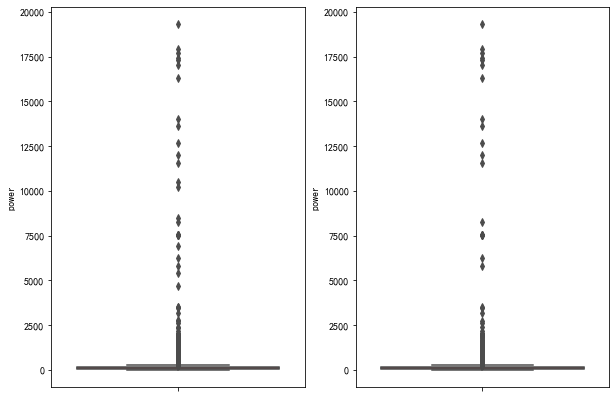

In [17]:
# 我们可以删掉一些异常数据，以 power 为例。  
# 这里删不删同学可以自行判断
# 但是要 注意 test 的数据不能删 = = 不能掩耳盗铃是不是

Train_data_p = outliers_proc(train_b, 'power', scale=3)

In [18]:
##剔除的化可能分布会变更差
##改为有极少值大于600 将大于600定为600；
train_b['power'] = train_b['power'].apply(lambda x: 600 if x>600 else x)
TestA_b['power'] = TestA_b['power'].apply(lambda x: 600 if x>600 else x)

### 3.3.3 特征构造

对车龄进行分箱

In [19]:
train_b['age_bin'] = train_b['age'].apply(lambda x : (x-x%5)/5)
TestA_b['age_bin'] = TestA_b['age'].apply(lambda x : (x-x%5)/5)

'regionCode' 从邮编中提取城市信息，相当于加入了先验知识

In [20]:
train_b['city'] = train_b['regionCode'].apply(lambda x : str(x)[:-3])
TestA_b['city'] = TestA_b['regionCode'].apply(lambda x : str(x)[:-3])

"brand"按品牌计算统计指标做衍生特征

In [21]:
price_stats_grouped_by_brand = train_b.groupby(['brand'])['price'].agg(['median','mean','size','std','max','min']).reset_index()
price_stats_grouped_by_brand.columns = ['brand',
                                        'price_brand_gp_median',
                                        'price_brand_gp_mean',
                                        'brand_gp_size',
                                        'price_brand_gp_std',
                                        'price_brand_gp_max',
                                        'price_brand_gp_min']
price_stats_grouped_by_brand.head()

,brand,price_brand_gp_median,price_brand_gp_mean,brand_gp_size,price_brand_gp_std,price_brand_gp_max,price_brand_gp_min
0,0,3199.0,5535.364994,31480,6272.522119,68500,13
1,1,6499.0,9273.311947,13794,9369.631497,99900,15
2,2,7700.0,12037.822430,321,10875.892891,59800,35
3,3,4990.0,6482.822430,2461,5396.327503,37500,65
4,4,6000.0,8538.788074,16737,8472.393191,99999,12


In [22]:
train_b = train_b.merge(price_stats_grouped_by_brand, on='brand', how='left')
train_b.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,age,used_days,age_bin,city,price_brand_gp_median,price_brand_gp_mean,brand_gp_size,price_brand_gp_std,price_brand_gp_max,price_brand_gp_min
0,0,736,20040402.0,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12,4385.0,2.0,1,1800.0,3611.840266,10217,4681.293524,59900,13
1,1,2262,20030301.0,40.0,1,2.0,0.0,0.0,0,15.0,2.0,4366,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13,4757.0,2.0,4,6499.0,9273.311947,13794,9369.631497,99900,15
2,2,14874,20040403.0,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12,4382.0,2.0,2,8500.0,9858.582990,1458,5425.058140,45000,100
3,3,71865,19960908.0,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20,7125.0,4.0,,5400.0,8470.804197,14249,8988.307535,98000,15
4,4,111080,20120103.0,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4,1531.0,0.0,6,2300.0,3306.349411,4665,3343.624586,31500,20


In [23]:
TestA_b = TestA_b.merge(price_stats_grouped_by_brand, on='brand', how='left')
TestA_b.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,age,used_days,age_bin,city,price_brand_gp_median,price_brand_gp_mean,brand_gp_size,price_brand_gp_std,price_brand_gp_max,price_brand_gp_min
0,150000,66932,20111212.0,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654,5,1569.0,1.0,1,6000.0,8538.788074,16737,8472.393191,99999,12
1,150001,174960,19990211.0,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055,17,6262.0,3.0,5,4200.0,5725.553329,1547,5256.938631,35999,50
2,150002,5356,20090304.0,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033,7,2561.0,1.0,5,4200.0,5725.553329,1547,5256.938631,35999,50
3,150003,50688,20100405.0,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775,6,2181.0,1.0,4,3199.0,5535.364994,31480,6272.522119,68500,13
4,150004,161428,19970703.0,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290,19,6824.0,3.0,3,1700.0,3052.660203,16089,3605.240255,38990,12


对power采用分箱

In [24]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(21)]
train_b['power_bin'] = pd.cut(train_b['power'], bin, labels=False)
train_b[['power_bin', 'power']].head()
TestA_b['power_bin'] = pd.cut(TestA_b['power'], bin, labels=False)
TestA_b[['power_bin', 'power']].head()


,power_bin,power
0,NaN,313
1,7.0,75
2,10.0,109
3,15.0,160
4,7.0,75


对'kilometer'归一化

In [25]:
train_b['kilometer']=((train_b['kilometer'] - np.min(train_b['kilometer'])) / 
                        (np.max(train_b['kilometer']) - np.min(train_b['kilometer'])))
train_b.head()
TestA_b['kilometer']=((TestA_b['kilometer'] - np.min(TestA_b['kilometer'])) / 
                        (np.max(TestA_b['kilometer']) - np.min(TestA_b['kilometer'])))

In [26]:
# 对类别特征进行 OneEncoder
train_b = pd.get_dummies(train_b, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])
TestA_b = pd.get_dummies(TestA_b, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [27]:
train_b.head()

,SaleID,name,regDate,power,kilometer,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,age,used_days,...,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0,notRepairedDamage_2.0,power_bin_0.0,power_bin_1.0,power_bin_2.0,power_bin_3.0,power_bin_4.0,power_bin_5.0,power_bin_6.0,power_bin_7.0,power_bin_8.0,power_bin_9.0,power_bin_10.0,power_bin_11.0,power_bin_12.0,power_bin_13.0,power_bin_14.0,power_bin_15.0,power_bin_16.0,power_bin_17.0,power_bin_18.0,power_bin_19.0
0,0,736,20040402.0,60,0.827586,1046,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12,4385.0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2262,20030301.0,0,1.000000,4366,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,13,4757.0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,14874,20040403.0,163,0.827586,2806,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12,4382.0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,71865,19960908.0,193,1.000000,434,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,20,7125.0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,111080,20120103.0,68,0.310345,6977,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4,1531.0,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.3.4 特征选择（去除共线特征）

1) 过滤式

虽然数据集中的变量之间通常具有较小的相关性，但高度共线性变量可能是多余的，我们只需要保留其中一个特征即可为模型提供必要的信息。

* 删除共线特征是一种通过减少特征数量来降低模型复杂性的方法，可以增加模型泛化能力。

以下代码
* 通过删除所比较的两个特征之一，根据我们为相关系数选择的阈值来移除共线特征
* 它还打印其删除的相关性，以便我们看到调整阈值的效果。

我们将阈值设置为0.9，如果特征之间的相关系数超过该值，则删除一对特征中的一个。
（仅针对v_系列特征进行筛选）

In [30]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
       删除数据帧中相关系数大于阈值的共线特征。 删除共线特征可以帮助模型泛化并提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据帧
    '''
    
    # 在数据副本上进行操作
    x = x.copy()
    
    # 仅对v_系列特征进行处理
    x_numeric = x[['v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
                    'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']]
    
    
    # 计算相关性矩阵
    corr_matrix = x_numeric.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 迭代相关性矩阵并比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果相关性超过阈值
            if val >= threshold:
                # 打印有相关性的特征和相关值
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 3))
                drop_cols.append(col.values[0])

    # 删除每对相关列中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # 将得分添加回数据

               
    return x

In [31]:
train_c = remove_collinear_features(train_b, threshold=0.9)
TestA_c = remove_collinear_features(TestA_b, threshold=0.9)

v_5 | v_2 | 0.922
v_6 | v_1 | 0.999
v_7 | v_2 | 0.974
v_7 | v_5 | 0.939
v_8 | v_3 | 0.933
v_9 | v_4 | 0.963
v_10 | v_1 | 0.922
v_10 | v_6 | 0.917
v_13 | v_4 | 0.935
v_5 | v_2 | 0.917
v_6 | v_1 | 0.999
v_7 | v_2 | 0.972
v_7 | v_5 | 0.936
v_8 | v_3 | 0.935
v_9 | v_4 | 0.964
v_10 | v_1 | 0.924
v_10 | v_6 | 0.919
v_13 | v_4 | 0.935


In [32]:
train_c.columns

Index(['SaleID', 'name', 'regDate', 'power', 'kilometer', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1',
       ...
       'power_bin_10.0', 'power_bin_11.0', 'power_bin_12.0', 'power_bin_13.0',
       'power_bin_14.0', 'power_bin_15.0', 'power_bin_16.0', 'power_bin_17.0',
       'power_bin_18.0', 'power_bin_19.0'],
      dtype='object', length=354)

In [36]:
train_c.drop(['creatDate','regDate', 'name'],axis=1,inplace=True)
TestA_c.drop(['creatDate','regDate', 'name'],axis=1,inplace=True)

In [37]:
train_c.head()

,SaleID,power,kilometer,regionCode,price,v_0,v_1,v_2,v_3,v_4,v_11,v_12,v_14,age,used_days,age_bin,city,price_brand_gp_median,price_brand_gp_mean,brand_gp_size,price_brand_gp_std,price_brand_gp_max,price_brand_gp_min,model_0.0,model_1.0,...,gearbox_0.0,gearbox_1.0,notRepairedDamage_0.0,notRepairedDamage_1.0,notRepairedDamage_2.0,power_bin_0.0,power_bin_1.0,power_bin_2.0,power_bin_3.0,power_bin_4.0,power_bin_5.0,power_bin_6.0,power_bin_7.0,power_bin_8.0,power_bin_9.0,power_bin_10.0,power_bin_11.0,power_bin_12.0,power_bin_13.0,power_bin_14.0,power_bin_15.0,power_bin_16.0,power_bin_17.0,power_bin_18.0,power_bin_19.0
0,0,60,0.827586,1046,1850,43.357796,3.966344,0.050257,2.159744,1.143786,2.804097,-2.420821,0.914762,12,4385.0,2.0,1,1800.0,3611.840266,10217,4681.293524,59900,13,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1.000000,4366,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,2.096338,-1.030483,0.245522,13,4757.0,2.0,4,6499.0,9273.311947,13794,9369.631497,99900,15,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,163,0.827586,2806,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,1.803559,1.565330,-0.229963,12,4382.0,2.0,2,8500.0,9858.582990,1458,5425.058140,45000,100,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,193,1.000000,434,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,1.285940,-0.501868,-0.478699,20,7125.0,4.0,,5400.0,8470.804197,14249,8988.307535,98000,15,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,68,0.310345,6977,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.910783,0.931110,1.923482,4,1531.0,0.0,6,2300.0,3306.349411,4665,3343.624586,31500,20,0,0,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
train_c.to_csv('train_for_tree.csv', index=0)
TestA_c.to_csv('TestA_for_tree.csv', index=0)

### 3.4经验总结

参考了 https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281978.0.0.6802593aq0tFcY&postId=95501
       https://github.com/cyl89458/datawhale_tianchi/blob/master/Task03.ipynb

特征工程的主要目的还是在于将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能。比如，异常值处理是为了去除噪声，填补缺失值可以加入先验知识等。

特征构造也属于特征工程的一部分，其目的是为了增强数据的表达。

有些比赛的特征是匿名特征，这导致我们并不清楚特征相互直接的关联性，这时我们就只有单纯基于特征进行处理，比如装箱，groupby，agg 等这样一些操作进行一些特征统计，此外还可以对特征进行进一步的 log，exp 等变换，或者对多个特征进行四则运算（如上面我们算出的使用时长），多项式组合等然后进行筛选。由于特性的匿名性其实限制了很多对于特征的处理，当然有些时候用 NN 去提取一些特征也会达到意想不到的良好效果。

对于知道特征含义（非匿名）的特征工程，特别是在工业类型比赛中，会基于信号处理，频域提取，丰度，偏度等构建更为有实际意义的特征，这就是结合背景的特征构建，在推荐系统中也是这样的，各种类型点击率统计，各时段统计，加用户属性的统计等等，这样一种特征构建往往要深入分析背后的业务逻辑或者说物理原理，从而才能更好的找到 magic。

当然特征工程其实是和模型结合在一起的，这就是为什么要为 LR NN 做分桶和特征归一化的原因，而对于特征的处理效果和特征重要性等往往要通过模型来验证。

总的来说，特征工程是一个入门简单，但想精通非常难的一件事。

未完待续